In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [8]:
train[:3]

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235


In [9]:
test[:3]

,row_id,x,y,accuracy,time
0,0,0.1675,1.3608,107,930883
1,1,7.3909,2.5301,35,893017
2,2,8.0978,2.3473,62,976933


In [170]:
print train.place_id.nunique();

108390


In [77]:
print test.accuracy.max()
print test.accuracy.min()

print train.accuracy.max()
print train.accuracy.min()

1026
1
1033
1


In [80]:
print 'test x'
print test.x.max()
print test.x.min()
print 'test y'
print test.y.max()
print test.y.min()
print 'train x'
print train.x.max()
print train.x.min()
print 'train y'
print train.y.max()
print train.y.min()

test x
10.0
0.0
test y
10.0
0.0
train x
10.0
0.0
train y
10.0
0.0


In [25]:
train.corr()

,row_id,x,y,accuracy,time,place_id
row_id,1.000000,0.000051,-0.000085,0.000259,0.000080,-0.000424
x,0.000051,1.000000,-0.000338,0.000301,-0.000615,-0.002218
y,-0.000085,-0.000338,1.000000,0.000619,0.000638,-0.005038
accuracy,0.000259,0.000301,0.000619,1.000000,0.071927,0.000005
time,0.000080,-0.000615,0.000638,0.071927,1.000000,-0.002874
place_id,-0.000424,-0.002218,-0.005038,0.000005,-0.002874,1.000000


In [26]:
test.corr()

,row_id,x,y,accuracy,time
row_id,1.000000,0.000019,0.000077,-0.000265,0.000149
x,0.000019,1.000000,-0.002322,-0.001199,0.001897
y,0.000077,-0.002322,1.000000,-0.000222,0.001577
accuracy,-0.000265,-0.001199,-0.000222,1.000000,-0.023771
time,0.000149,0.001897,0.001577,-0.023771,1.000000


In [27]:
train[train['accuracy'] > 500].corr()

,row_id,x,y,accuracy,time,place_id
row_id,1.000000,0.000825,0.002262,0.000035,0.001709,-0.001461
x,0.000825,1.000000,0.000127,0.000331,-0.002119,-0.005457
y,0.002262,0.000127,1.000000,0.000665,-0.000037,-0.000126
accuracy,0.000035,0.000331,0.000665,1.000000,0.056777,0.000674
time,0.001709,-0.002119,-0.000037,0.056777,1.000000,-0.000260
place_id,-0.001461,-0.005457,-0.000126,0.000674,-0.000260,1.000000


In [60]:
train[train['accuracy'] < 500].corr()

,row_id,x,y,accuracy,time,place_id
row_id,1.000000,0.000034,-0.000135,0.000111,0.000043,-0.000403
x,0.000034,1.000000,-0.000349,0.000274,-0.000593,-0.002154
y,-0.000135,-0.000349,1.000000,0.000654,0.000641,-0.005136
accuracy,0.000111,0.000274,0.000654,1.000000,0.081007,-0.000884
time,0.000043,-0.000593,0.000641,0.081007,1.000000,-0.002945
place_id,-0.000403,-0.002154,-0.005136,-0.000884,-0.002945,1.000000


In [67]:
step = 100;

train_quadrant = train[['x']] // 0.5
train_quadrant['y'] = train[['y']] // 0.02

train['quadrant'] = train_quadrant['x'].apply(str) + '_' + train_quadrant['y'].apply(str)
print train[:5]

   row_id       x       y  accuracy    time    place_id    quadrant
0       0  0.7941  9.0809        54  470702  8523065625   1.0_454.0
1       1  5.9567  4.7968        13  186555  1757726713  11.0_239.0
2       2  8.3078  7.0407        74  322648  1137537235  16.0_352.0
3       3  7.3665  2.5165        65  704587  6567393236  14.0_125.0
4       4  4.0961  1.1307        31  472130  7440663949    8.0_56.0


In [58]:
print train[['place_id', 'quadrant']].corr()

          place_id  quadrant
place_id  1.000000 -0.005044
quadrant -0.005044  1.000000


In [68]:
train_grouped  = train.groupby("quadrant").agg({"place_id": lambda x: x.nunique()})

In [69]:
print train_grouped.place_id.max()
print train_grouped.place_id.min()
print train_grouped.place_id.mean()
print train_grouped[:5]

277
1
204.207129381
           place_id
quadrant           
0.0_0.0          97
0.0_1.0         129
0.0_10.0        155
0.0_100.0       169
0.0_101.0       192


In [39]:
train_grouped_by_quadrant = train.groupby("quadrant").agg({"place_id": lambda x: x.nunique()})

In [40]:
print train_grouped_by_quadrant.place_id.max()
print train_grouped_by_quadrant.place_id.min()
print train_grouped_by_quadrant.place_id.mean()
print train_grouped_by_quadrant[:5]

629
1
490.947985921
           place_id
quadrant           
0.0_0.0         256
0.0_1.0         352
0.0_10.0        448
0.0_100.0       467
0.0_101.0       470


In [63]:
print train_grouped_by_quadrant.reset_index()[:5]

   quadrant  place_id
0         0       138
1         1       168
2         2       186
3         3       173
4         4       156


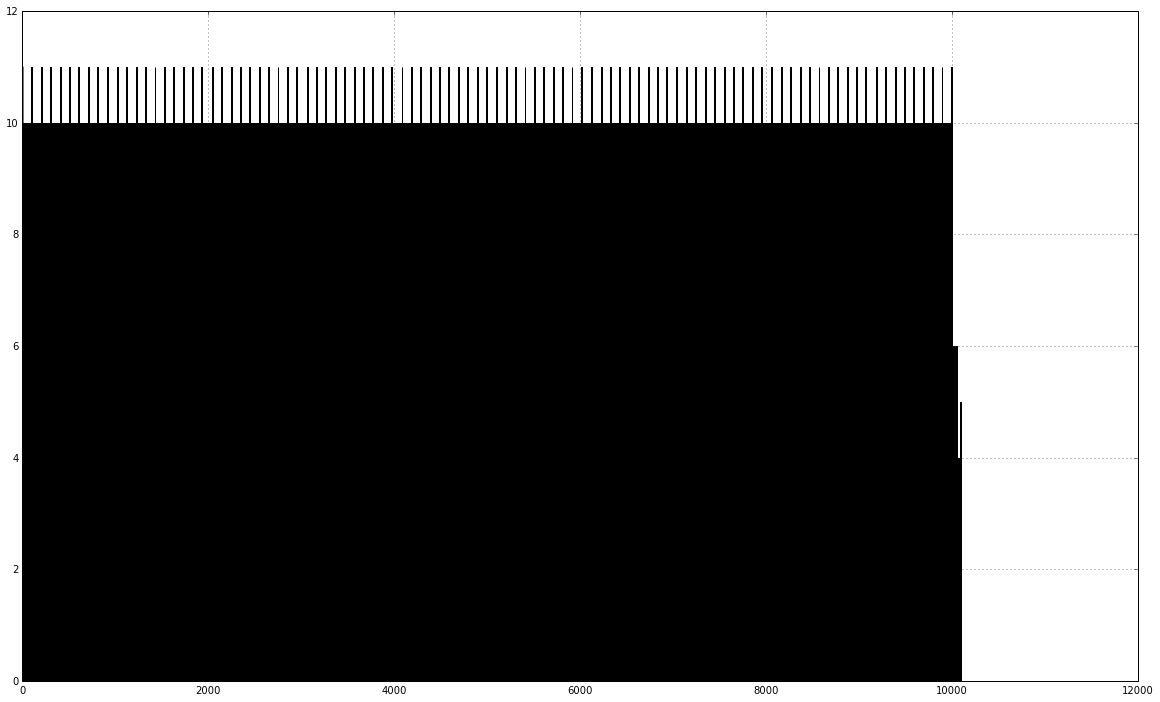

In [65]:
train_grouped_by_quadrant.reset_index()['quadrant'].hist(bins=1000, figsize=(20,12))

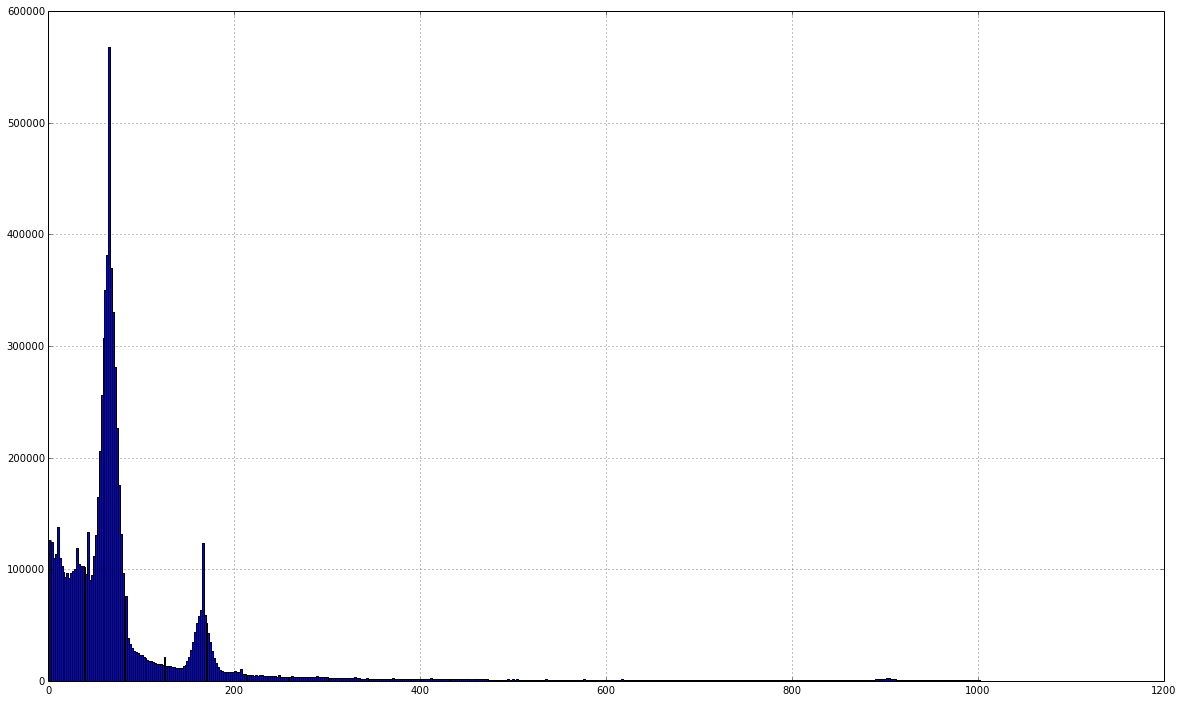

In [55]:
test['accuracy'].hist(bins=500, figsize=(20,12))

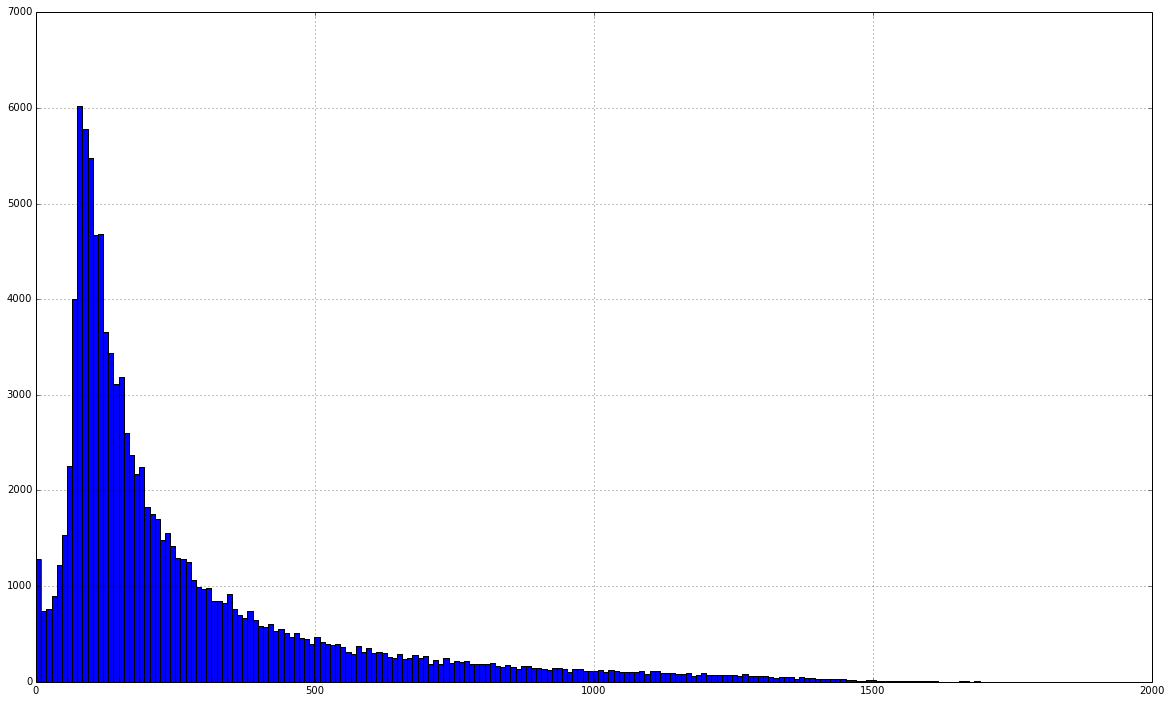

In [8]:
train_count = train.groupby("place_id").size().reset_index()
train_count.columns = ['place_id', 'count']
train_count['count'].hist(bins = 200, figsize=(20,12))

In [3]:
train_max_dist = pd.DataFrame();
train_max_dist['minx'] = train.groupby("place_id").agg({"x": lambda x: min(x)}).reset_index()['x']
train_max_dist['maxx'] = train.groupby("place_id").agg({"x": lambda x: max(x)}).reset_index()['x']
train_max_dist['miny'] = train.groupby("place_id").agg({"y": lambda y: min(y)}).reset_index()['y']
train_max_dist['maxy'] = train.groupby("place_id").agg({"y": lambda y: max(y)}).reset_index()['y']

train_max_dist['maxdistx'] = train_max_dist['maxx'] - train_max_dist['minx'] 
train_max_dist['maxdisty'] = train_max_dist['maxy'] - train_max_dist['miny']

train_max_dist['maxdistx'] = train_max_dist['maxdistx'].abs();
train_max_dist['maxdisty'] = train_max_dist['maxdisty'].abs();


In [47]:
print train_max_dist[:5]
print
print
print train_max_dist.maxdisty.max();
print train_max_dist.maxdistx.max();
print
print
print train_max_dist.maxdisty.mean();
print train_max_dist.maxdistx.mean();

     minx    maxx    miny    maxy  maxdistx  maxdisty
0  1.6174  3.6009  5.4939  5.5932    1.9835    0.0993
1  6.8487  7.8008  4.3191  4.3715    0.9521    0.0524
2  0.6120  2.2128  5.5443  5.5980    1.6008    0.0537
3  0.5315  9.6667  5.7566  5.8791    9.1352    0.1225
4  1.9661  9.2497  7.4749  7.9552    7.2836    0.4803


9.116
9.9993


0.212383289049
5.96165545438


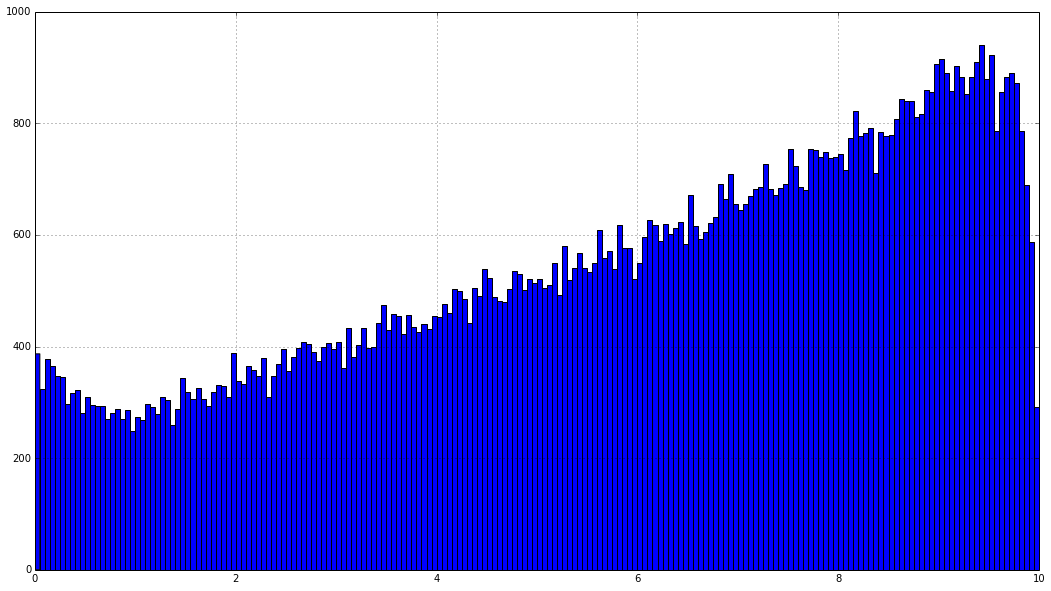

In [49]:
train_max_dist["maxdistx"].hist(bins=200, figsize=(18,10))

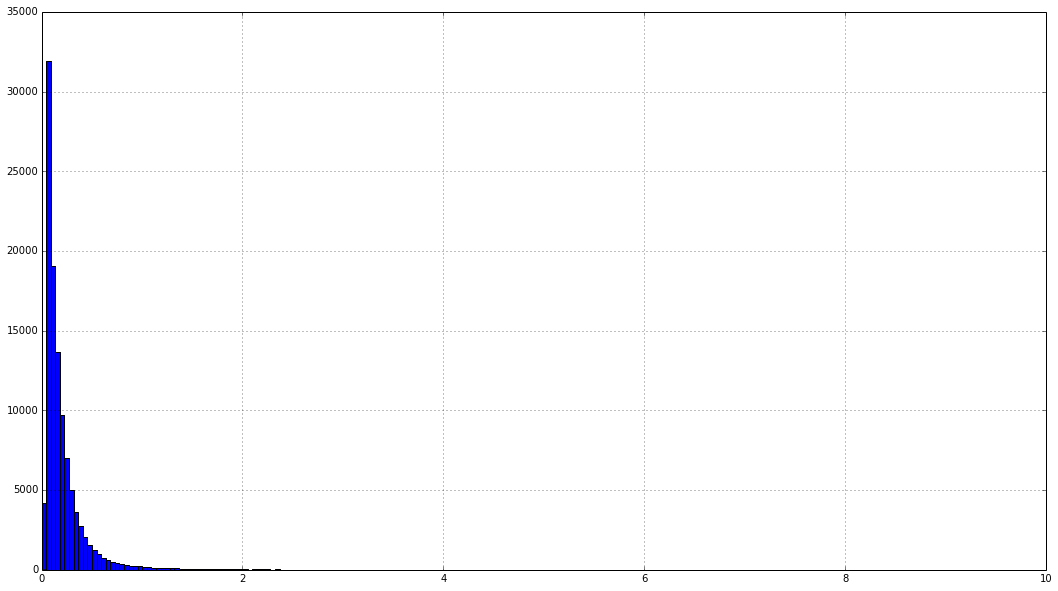

In [4]:
train_max_dist["maxdisty"].hist(bins=200, figsize=(18,10))

In [12]:
train_ha_max_dist = pd.DataFrame();
train_ha_max_dist['minx'] = train[train['accuracy'] > 500].groupby("place_id").agg({"x": lambda x: min(x)}).reset_index()['x']
train_ha_max_dist['maxx'] = train[train['accuracy'] > 500].groupby("place_id").agg({"x": lambda x: max(x)}).reset_index()['x']
train_ha_max_dist['miny'] = train[train['accuracy'] > 500].groupby("place_id").agg({"y": lambda y: min(y)}).reset_index()['y']
train_ha_max_dist['maxy'] = train[train['accuracy'] > 500].groupby("place_id").agg({"y": lambda y: max(y)}).reset_index()['y']

train_ha_max_dist['maxdistx'] = train_ha_max_dist['maxx'] - train_ha_max_dist['minx'] 
train_ha_max_dist['maxdisty'] = train_ha_max_dist['maxy'] - train_ha_max_dist['miny']

train_ha_max_dist['maxdistx'] = train_ha_max_dist['maxdistx'].abs();
train_ha_max_dist['maxdisty'] = train_ha_max_dist['maxdisty'].abs();

In [20]:
print train_ha_max_dist[:5]
print
print
print train_ha_max_dist.maxdisty.max();
print train_ha_max_dist.maxdistx.max();
print
print
print train_ha_max_dist.maxdisty.mean();
print train_ha_max_dist.maxdistx.mean();

     minx    maxx    miny    maxy  maxdistx  maxdisty
0  2.6915  2.6915  5.5346  5.5346    0.0000    0.0000
1  0.9771  1.2611  5.5577  5.5861    0.2840    0.0284
2  0.5315  6.0321  5.7929  5.8502    5.5006    0.0573
3  4.4086  5.9554  7.4749  7.5642    1.5468    0.0893
4  0.2846  3.4308  0.5837  0.8402    3.1462    0.2565


3.2794
9.9014


0.0343754968941
1.22114161508


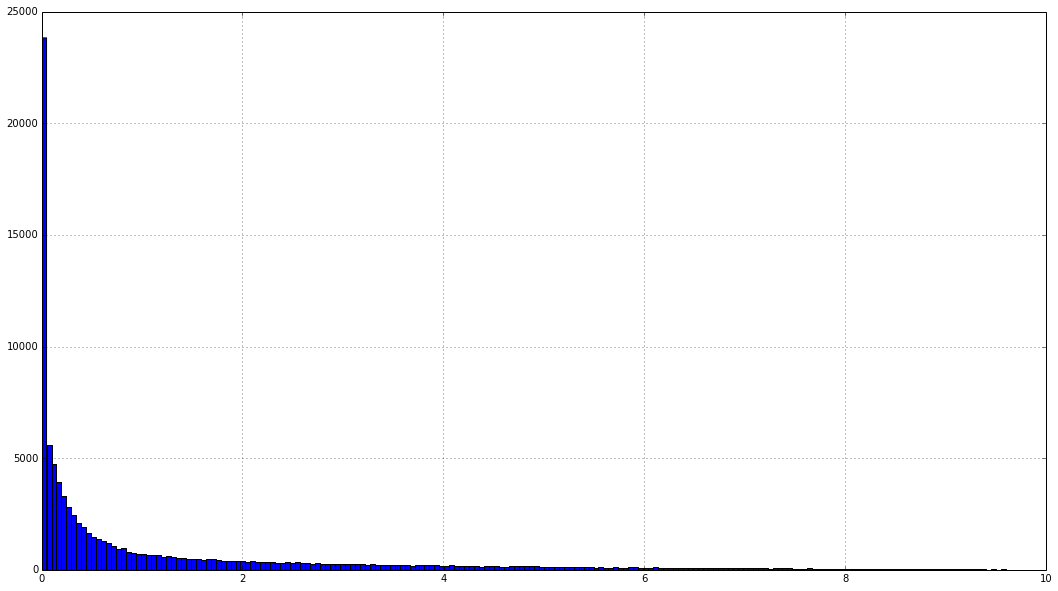

In [14]:
train_ha_max_dist["maxdistx"].hist(bins=200, figsize=(18,10))

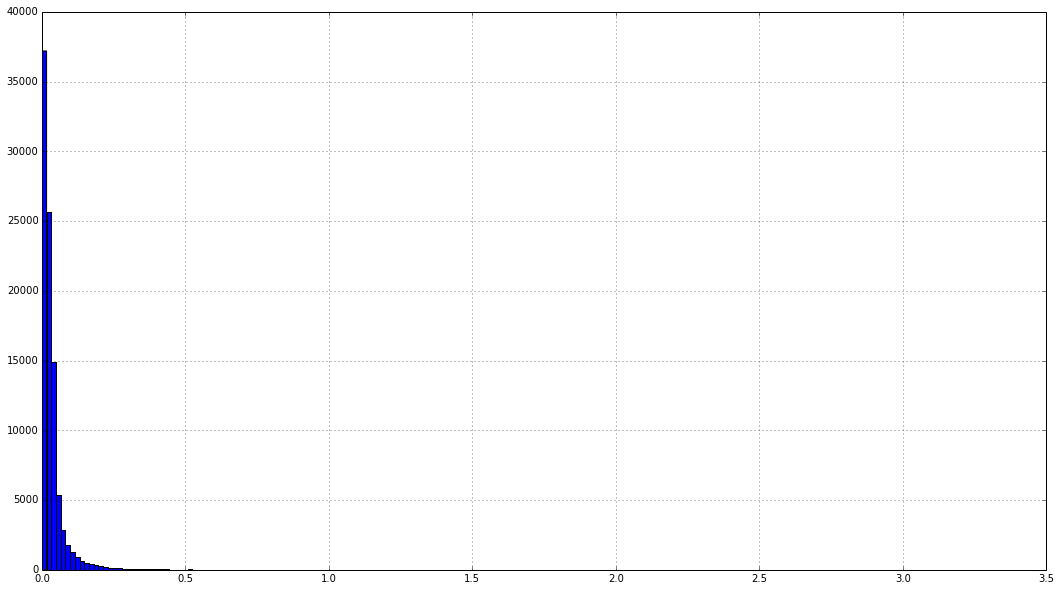

In [15]:
train_ha_max_dist["maxdisty"].hist(bins=200, figsize=(18,10))

In [17]:
train_la_max_dist = pd.DataFrame();
train_la_max_dist['minx'] = train[train['accuracy'] < 500].groupby("place_id").agg({"x": lambda x: min(x)}).reset_index()['x']
train_la_max_dist['maxx'] = train[train['accuracy'] < 500].groupby("place_id").agg({"x": lambda x: max(x)}).reset_index()['x']
train_la_max_dist['miny'] = train[train['accuracy'] < 500].groupby("place_id").agg({"y": lambda y: min(y)}).reset_index()['y']
train_la_max_dist['maxy'] = train[train['accuracy'] < 500].groupby("place_id").agg({"y": lambda y: max(y)}).reset_index()['y']

train_la_max_dist['maxdistx'] = train_la_max_dist['maxx'] - train_la_max_dist['minx'] 
train_la_max_dist['maxdisty'] = train_la_max_dist['maxy'] - train_la_max_dist['miny']

train_la_max_dist['maxdistx'] = train_la_max_dist['maxdistx'].abs();
train_la_max_dist['maxdisty'] = train_la_max_dist['maxdisty'].abs();

In [21]:
print train_la_max_dist[:5]
print
print
print train_la_max_dist.maxdisty.max();
print train_la_max_dist.maxdistx.max();
print
print
print train_la_max_dist.maxdisty.mean();
print train_la_max_dist.maxdistx.mean();

     minx    maxx    miny    maxy  maxdistx  maxdisty
0  1.6174  3.6009  5.4939  5.5932    1.9835    0.0993
1  6.8487  7.8008  4.3191  4.3715    0.9521    0.0524
2  0.6120  2.2128  5.5443  5.5980    1.6008    0.0537
3  0.6817  9.6667  5.7566  5.8791    8.9850    0.1225
4  1.9661  9.2497  7.5280  7.9552    7.2836    0.4272


9.116
9.9993


0.209681535679
5.90097842077


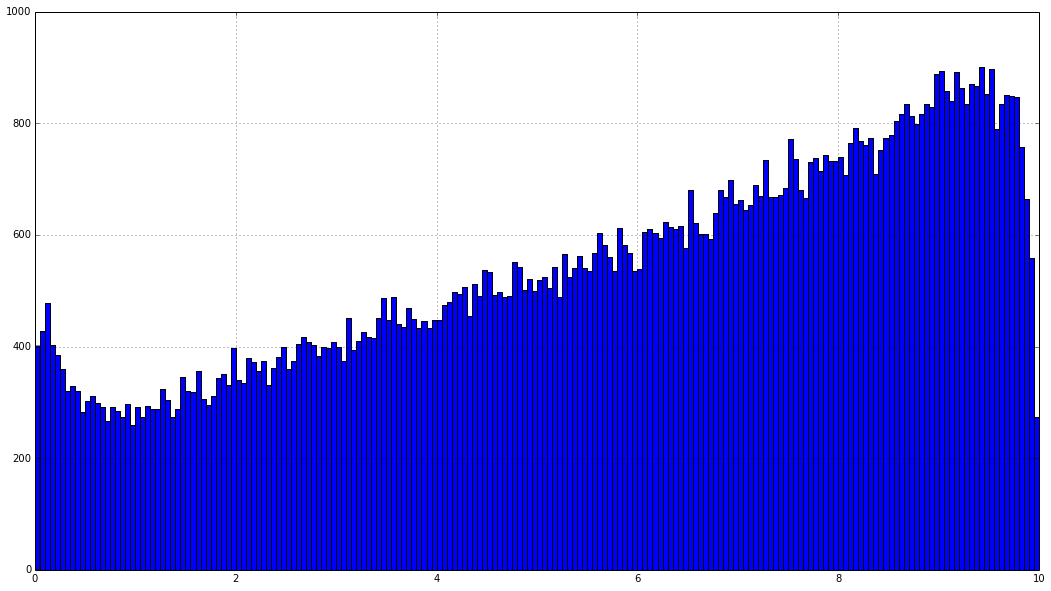

In [18]:
train_la_max_dist["maxdistx"].hist(bins=200, figsize=(18,10))

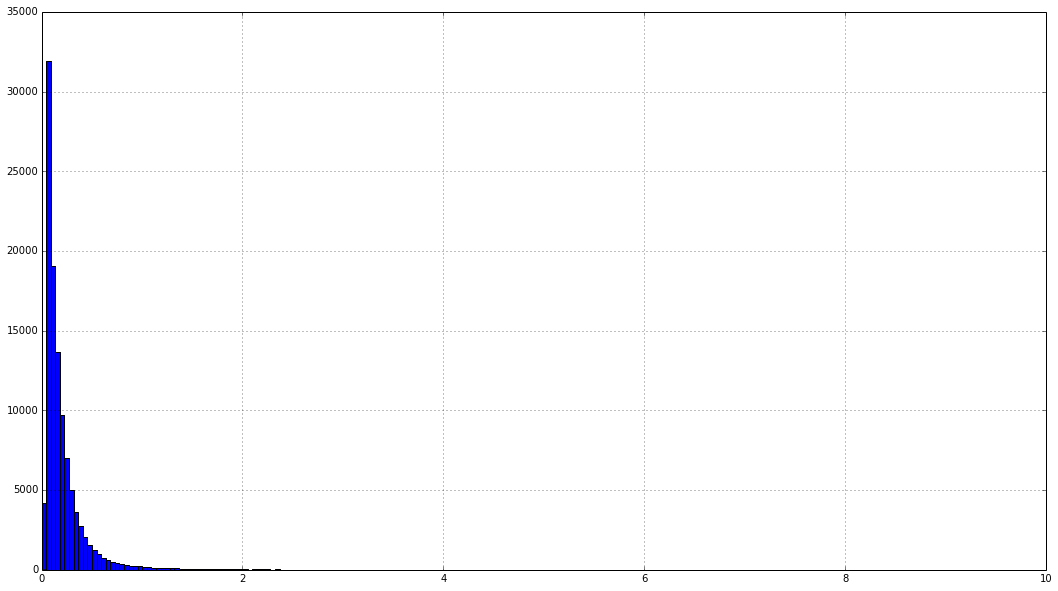

In [19]:
train_max_dist["maxdisty"].hist(bins=200, figsize=(18,10))